In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census

# Census API Key
from config import api_key
c = Census(api_key, year=2016)
#c.acs5.tables()

In [2]:
params = {
  "api_key": api_key,
  "format": "csv"
  }
r = requests.get('https://api.census.gov/data/2017/acs/acs5/profile/variables.json', params=params)
print(r.text)

# This bit of code will write the result of the query to output.csv

with open('output.csv', 'w+') as f:
    f.write(r.text)


{
  "variables": {
    "for": {
      "label": "Census API FIPS 'for' clause",
      "concept": "Census API Geography Specification",
      "predicateType": "fips-for",
      "group": "N/A",
      "limit": 0,
      "predicateOnly": true
    },
    "in": {
      "label": "Census API FIPS 'in' clause",
      "concept": "Census API Geography Specification",
      "predicateType": "fips-in",
      "group": "N/A",
      "limit": 0,
      "predicateOnly": true
    },
    "ucgid": {
      "label": "Uniform Census Geography Identifier clause",
      "concept": "Census API Geography Specification",
      "predicateType": "ucgid",
      "group": "N/A",
      "limit": 0,
      "predicateOnly": true
    },
    "DP02_0126E": {
      "label": "Estimate!!ANCESTRY!!Total population!!Danish",
      "concept": "SELECTED SOCIAL CHARACTERISTICS IN THE UNITED STATES",
      "predicateType": "int",
      "group": "DP02",
      "limit": 0,
      "attributes": "DP02_0126M,DP02_0126MA,DP02_0126EA"
    },
    "

In [3]:
inner_zips=['77002','77003','77004','77005','77006','77007','77008','77009',
            '77010','77011','77012','77019','77020','77021','77023','77025',
            '77026','77027','77030']

In [4]:
dictionary = {'NAME' : [],
              "Year" : [],
             "B19013_001E" : [],
             "B01003_001E" : [],
             "B01002_001E" : [],
             "B19301_001E" : [],
             "B17001_002E" : [],
             "zip code tabulation area" : []}

hou_zips = inner_zips

years = list(range(2012, 2018))

for y in years:
    c = Census(api_key, year=y)
    for z in hou_zips:
        census_loop = c.acs5.get(("NAME", "B19013_001E", "B01003_001E",
                              "B01002_001E", "B19301_001E",
                              "B17001_002E"), {'for': f'zip code tabulation area:{z}'})
#         print(census_loop)
        dictionary['NAME'].append(census_loop[0]['NAME'])
        dictionary['Year'].append(y)
        dictionary['B19013_001E'].append(census_loop[0]["B19013_001E"])
        dictionary['B01003_001E'].append(census_loop[0]["B01003_001E"])
        dictionary['B01002_001E'].append(census_loop[0]["B01002_001E"])
        dictionary['B19301_001E'].append(census_loop[0]["B19301_001E"])
        dictionary['B17001_002E'].append(census_loop[0]["B17001_002E"])
        dictionary['zip code tabulation area'].append(census_loop[0]["zip code tabulation area"])

# dictionary

In [5]:
census_df = pd.DataFrame(dictionary)
census_df.head()

,NAME,Year,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E,zip code tabulation area
0,ZCTA5 77002,2012,57165.0,11473.0,31.8,32514.0,813.0,77002
1,ZCTA5 77003,2012,37664.0,10215.0,32.9,27248.0,3868.0,77003
2,ZCTA5 77004,2012,39804.0,29853.0,31.6,29787.0,6957.0,77004
3,ZCTA5 77005,2012,153041.0,25740.0,38.5,88579.0,635.0,77005
4,ZCTA5 77006,2012,63360.0,19856.0,36.9,60795.0,2647.0,77006


In [6]:
census_pd = census_df.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})
census_pd.head()

,Name,Year,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Zipcode
0,ZCTA5 77002,2012,57165.0,11473.0,31.8,32514.0,813.0,77002
1,ZCTA5 77003,2012,37664.0,10215.0,32.9,27248.0,3868.0,77003
2,ZCTA5 77004,2012,39804.0,29853.0,31.6,29787.0,6957.0,77004
3,ZCTA5 77005,2012,153041.0,25740.0,38.5,88579.0,635.0,77005
4,ZCTA5 77006,2012,63360.0,19856.0,36.9,60795.0,2647.0,77006


In [ ]:
census_pd.describe()

ValueError: Unrecognized character Z in format string

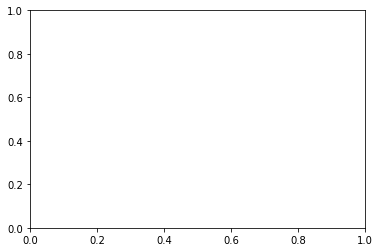

In [9]:
#POssible Line Graph



In [ ]:
#Possible HeatMap
fig, ax = plt.subplots()
im = ax.imshow()

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()
